In [0]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn import metrics

from sklearn.metrics import roc_curve, roc_auc_score

In [0]:
classifiers = [GaussianNB(), 
               KNeighborsClassifier(), 
               SVC(kernel='linear', random_state=123, probability=True),
               DecisionTreeClassifier(random_state=123)]


In [0]:
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

In [0]:
names = ['GausianNB', 'KNN', 'SVM','DT']
for idx in range(len(names)):
    model = classifiers[idx].fit(X_train_SMOTE, y_train_SMOTE)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':names[idx],
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)


In [0]:
print(result_table)

  classifiers  ...       auc
0   GausianNB  ...  0.647001
1         KNN  ...  0.547975
2         SVM  ...  0.681838
3          DT  ...  0.525893

[4 rows x 4 columns]


In [0]:
result_table.set_index('classifiers', inplace=True)

In [0]:
print(result_table)

                                                           fpr  ...       auc
classifiers                                                     ...          
GausianNB    [0.0, 0.29446640316205536, 0.2964426877470356,...  ...  0.647001
KNN          [0.0, 0.11462450592885376, 0.2490118577075099,...  ...  0.547975
SVM          [0.0, 0.003952569169960474, 0.0039525691699604...  ...  0.681838
DT           [0.0, 0.1442687747035573, 0.14624505928853754,...  ...  0.525893

[4 rows x 3 columns]


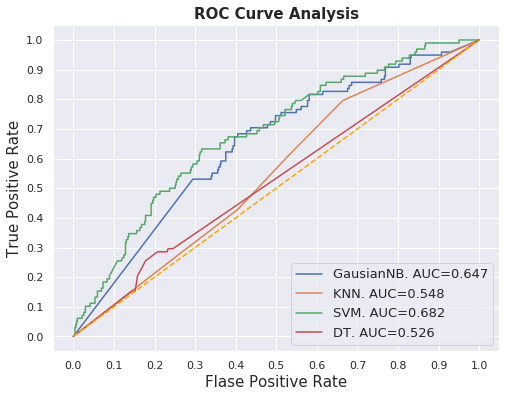

In [0]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],
             result_table.loc[i]['tpr'], 
             label="{}. AUC={:.3f}".format(i,result_table.loc[i]['auc']))
"""

plt.plot(result_table.loc['GaussianNB']['fpr'],
         result_table.loc['GaussianNB']['tpr'],
         label = "{}, AUC={:.3f}".format("GaussianNB",result_table.loc['GaussianNB']['auc']))
"""

plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()